In [11]:
import numpy as np
import random
import collections 
import matplotlib.pyplot as plt

In [12]:
#awards rewards based on winnings 
def check_win(configuration):
    wins = [[0,1,2],[3,4,5],[6,7,8],
            [0,3,6],[1,4,7],[2,5,8],
            [0,4,8],[2,4,6]]
    
    for i in range(8):
        if (configuration[wins[i][0]] == 1 and
            configuration[wins[i][1]] == 1 and
            configuration[wins[i][2]] == 1):
            return 1
    
    for i in range(8):
        if (configuration[wins[i][0]] == 2 and
            configuration[wins[i][1]] == 2 and
            configuration[wins[i][2]] == 2 ):
            return -1
    return 0

In [13]:
#converts the board into an integer to store the values
def state_to_key(state):
    key = 0
    for i, elem in enumerate(state):
        key += int(elem * 3**(i))
    return key

In [14]:
#returns the next and reward given a state and action
def make_move(state,action,player):
    state[action]=player
    reward=check_win(state)
    return state,reward

In [15]:
# for the mc agent to selects action based on the Q values
def mc_select_action(state,act_choices,q):
    act_chosen=-1
    q_val=-1000
    for act in act_choices:
        if (q[state][act]!=0 and q[state][act]>q_val):
            q_val=pi[state][act]
            act_chosen=act
    if (act_chosen<0):
        act_chosen = random.choice(act_choices)
        
    return act_chosen

In [26]:
#agent is playing based on the trained q values
def play_using_q(q):
    global win_list, loss_list, tie_list
    wins = 0 
    loss = 0 
    tie = 0 

    for i in range(1000):
        state = np.zeros(9)
        action_choices = [0,1,2,3,4,5,6,7,8]
        player=random.choice([0,1])
        reward=0
        while(len(action_choices)>0 and reward==0):
            player=player%2+1
            if (player==1):
                action = mc_select_action(state_to_key(state),action_choices,q) 
            else:
                action = random.choice(action_choices) 
            action_choices.remove(action)   
            new_state,reward=make_move(state,action,player)  
            
        if (reward==1):
            wins+=1
        elif (reward==-1):
            loss+=1
        else:
            tie+=1
            
    total=wins+loss+tie
    win_pct=round(100*wins/total,2)
    loss_pct=round(100*loss/total,2)
    tie_pct=round(100*tie/total,2)
    if total>0:
        win_list.append(win_pct)
        loss_list.append(loss_pct)
        tie_list.append(tie_pct)
    print("   wins: ",win_pct,"; loss: ", loss_pct,"; tie: ",tie_pct)
    
    '''win_list.append(wins)
    loss_list.append(loss)
    tie_list.append(tie)
    print("    Win : ", wins, "Loss : ", loss, "Ties : ", tie)'''

In [27]:
#training function under 1 million episodes
def monte_carlo_control(pi,Q,Counts):
    global x_axis
    episode=[]
    for i in range(1000001):
        state = np.zeros(9)
        action_choices = [0,1,2,3,4,5,6,7,8]
        player=random.choice([0,1])
        #player= 0
        reward=0
        episode=[]
        rewards=[]
        while(len(action_choices)>0 and reward==0):
            player=player%2+1
            state_key=state_to_key(state)
            action =  random.choice(action_choices)
            action_choices.remove(action)   
            new_state,reward=make_move(state,action,player) 
            episode.append((state_key,action))
            rewards.append(reward)
            state=new_state
            
        G=0
        for j,(s,a) in enumerate(reversed(episode)):
            ind_frw=len(rewards)-j-1
            reward=rewards[ind_frw]
            G+=reward
            if (s,a) not in episode[:ind_frw]:
                Counts[s][a] += 1
                Q[s][a] += (G-Q[s][a])/Counts[s][a]

        if (i>0 and (i%100000==0 or i==5 or i==1000 or i==5000)):
            print("After ",i," episodes: ")
            x_axis.append(i)
            play_using_q(Q)

In [28]:
pi = np.zeros([3**9,9])
Counts = np.zeros([3**9,9])
Q = np.zeros([3**9,9])
win_list=[]
loss_list=[]
tie_list=[]
x_axis=[]
myQ=monte_carlo_control(pi,Q,Counts)

After  5  episodes: 
   wins:  42.5 ; loss:  42.2 ; tie:  15.3
After  1000  episodes: 
   wins:  49.8 ; loss:  40.2 ; tie:  10.0
After  5000  episodes: 
   wins:  53.7 ; loss:  38.3 ; tie:  8.0
After  100000  episodes: 
   wins:  79.7 ; loss:  15.5 ; tie:  4.8
After  200000  episodes: 
   wins:  83.4 ; loss:  12.8 ; tie:  3.8
After  300000  episodes: 
   wins:  86.7 ; loss:  8.6 ; tie:  4.7
After  400000  episodes: 
   wins:  84.8 ; loss:  11.4 ; tie:  3.8
After  500000  episodes: 
   wins:  83.1 ; loss:  12.2 ; tie:  4.7
After  600000  episodes: 
   wins:  85.5 ; loss:  9.3 ; tie:  5.2
After  700000  episodes: 
   wins:  82.4 ; loss:  11.9 ; tie:  5.7
After  800000  episodes: 
   wins:  83.3 ; loss:  11.9 ; tie:  4.8
After  900000  episodes: 
   wins:  84.3 ; loss:  10.6 ; tie:  5.1
After  1000000  episodes: 
   wins:  84.5 ; loss:  10.8 ; tie:  4.7


[42.5, 49.8, 53.7, 79.7, 83.4, 86.7, 84.8, 83.1, 85.5, 82.4, 83.3, 84.3, 84.5]
[42.2, 40.2, 38.3, 15.5, 12.8, 8.6, 11.4, 12.2, 9.3, 11.9, 11.9, 10.6, 10.8]
[15.3, 10.0, 8.0, 4.8, 3.8, 4.7, 3.8, 4.7, 5.2, 5.7, 4.8, 5.1, 4.7]
[5, 1000, 5000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]


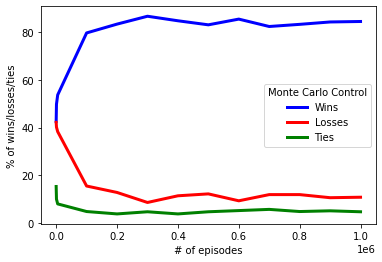

In [29]:
print(win_list)
print(loss_list)
print(tie_list)
print(x_axis)
plt.plot(x_axis,win_list,color='blue',linewidth=3,label='Wins')
plt.plot(x_axis,loss_list,color='red',linewidth=3,label='Losses')
plt.plot(x_axis,tie_list,color='green',linewidth=3,label='Ties')
plt.legend(title='Monte Carlo Control')
plt.xlabel("# of episodes")
plt.ylabel("% of wins/losses/ties")
plt.show()